In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

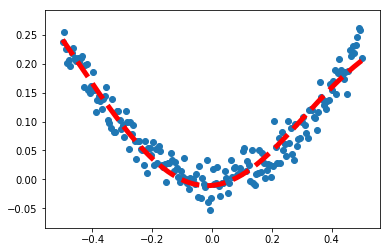

In [19]:

#回归问题，拟合一个二次曲线的点图

#在-0.5~0。5之间产生200个点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis] #[]内增加一个维度
noise=np.random.normal(0,0.02,x_data.shape) #加上噪声
y_data=np.square(x_data)+noise   #真实值

# 定义两个placeholder，先占好位，我们需要让得到的y值接近y_data
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#构建一个神经网络中间层
#tf.random_normal(shape)shape表示输出张量的形状
Weights_L1=tf.Variable(tf.random.normal([1,10]))
biases_L1=tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1
L1=tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层

Weights_L2=tf.Variable(tf.random_normal([10,1]))
biases_L2=tf.Variable(tf.zeros([1,1]))
#得到计算矩阵
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
#通过激活函数得到预测y值
prediction=tf.nn.tanh(Wx_plus_b_L2)


#开始最小化损失函数
#二次代价函数
loss=tf.reduce_mean(tf.square(y-prediction))
#梯度下降训练
train_step=tf.train.GradientDescentOptimizerOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化ua
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    #获取预测值
    prediction_value=sess.run(prediction,feed_dict={x:x_data})

    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,"r--",lw=5)
    plt.show()